In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
fileName = 'C:/Users/kazIm/Desktop/projects/IE490/input/tubitak_data2_processesed.csv'
df = pd.read_csv(fileName,  sep = ',')

In [3]:
#preview data
df.head()

,ilce_kod,mahalle_kod,bagimsiz_bolum_kat,yuzolcumu,yasal_burut_alani,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration
0,85,55035,0.0,478.33,85.0,85.0,62000.0,19.765702,0
1,86,57190,1.0,7961.00,97.0,97.0,100000.0,70.000000,0
2,80,3835,-1.0,722.00,100.0,100.0,85000.0,36.000000,0
3,80,3837,-2.0,353.00,51.0,51.0,45000.0,32.000000,0
4,86,57190,1.0,667.00,97.0,97.0,110000.0,56.000000,0


### Ilce 79

In [4]:
df.drop(df.index[df.ilce_kod!=79],inplace=True)
# df
df.drop('ilce_kod',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 209 to 101644
Data columns (total 8 columns):
mahalle_kod                       1135 non-null int64
bagimsiz_bolum_kat                1135 non-null float64
yuzolcumu                         1135 non-null float64
yasal_burut_alani                 1135 non-null float64
mevcut_alani                      1135 non-null float64
adil_piyasa_degeri_yasal_durum    1135 non-null float64
area                              1135 non-null float64
duration                          1135 non-null int64
dtypes: float64(6), int64(2)
memory usage: 79.8 KB


In [6]:
mahalle = df["mahalle_kod"]

In [7]:
df['mahalle_kod'].describe()

count    1135.000000
mean     4673.550661
std         1.064431
min      4673.000000
25%      4673.000000
50%      4673.000000
75%      4673.000000
max      4676.000000
Name: mahalle_kod, dtype: float64

In [8]:
#we can drop yasal burut alani as it has almost 1 correlation with mevcut alan
df = df.drop('yasal_burut_alani',axis=1)

In [9]:
mahalle = df['mahalle_kod']

### One Hot Encoding for Categorical Variables

In [10]:
# df = pd.get_dummies(df, columns=["ilce_kod"])
df = pd.get_dummies(df, columns=["mahalle_kod"])

In [11]:
df.head()

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
209,1.0,875.0,125.0,115000.0,60.000000,4,1,0,0,0
361,2.0,585.0,125.0,120000.0,60.000000,13,1,0,0,0
593,3.0,629.0,136.0,115000.0,50.000000,0,1,0,0,0
725,3.0,1252.0,133.0,90000.0,60.000000,1,1,0,0,0
809,2.0,968.0,178.0,130000.0,322.666667,2,0,0,1,0


In [12]:
df.shape

(1135, 10)

In [13]:
# X = df.drop('adil_piyasa_degeri_yasal_durum',axis=1)
# y = df['adil_piyasa_degeri_yasal_durum']

### Main Effect Graph 

In [14]:
df['AlanBand'] = pd.cut(df['mevcut_alani'], 50)
grouped_alan = df.groupby(['AlanBand'], as_index=False).mean().sort_values(by='AlanBand', ascending=True)
# alan50 = grouped.iloc[:].mevcut_alani

In [15]:
df['YuzolcumuBand'] = pd.cut(df['yuzolcumu'], 50)
grouped_yuzolcumu = df.groupby(['YuzolcumuBand'], as_index=False).mean().sort_values(by='YuzolcumuBand', ascending=True)
# yuzolcumu50 = grouped.iloc[:].mevcut_alani


In [16]:
df['AreaBand'] = pd.cut(df['area'], 50)
grouped_area = df.groupby(['AreaBand'], as_index=False).mean().sort_values(by='AreaBand', ascending=True)
# area50 = grouped.iloc[:].mevcut_alani


In [17]:
df['KatBand'] = pd.cut(df['bagimsiz_bolum_kat'], 50)
grouped_kat = df.groupby(['KatBand'], as_index=False).mean().sort_values(by='KatBand', ascending=True)
# kat50 = grouped.iloc[:].mevcut_alani


### 1. Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [18]:
X = df.drop(['adil_piyasa_degeri_yasal_durum','AlanBand','YuzolcumuBand','AreaBand','KatBand'],axis=1)
y = df['adil_piyasa_degeri_yasal_durum']

In [19]:
RANDOM_STATE = 42

In [20]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(bootstrap=True,
                             oob_score=True,
                             max_depth = 40,
                             max_features = 4,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             n_estimators = 300,
                             random_state = RANDOM_STATE)
rf = regr.fit(X, y)


#### Means 

In [21]:
means = df.describe().loc[['mean']]
means

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
mean,2.208811,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159


#### Mevcut Alan Graph 

In [22]:
func = lambda x : x.left
grouped_alan = grouped_alan.AlanBand.apply(func)
grouped_alan

0       -0.451
1       30.020
2       59.040
3       88.060
4      117.080
5      146.100
6      175.120
7      204.140
8      233.160
9      262.180
10     291.200
11     320.220
12     349.240
13     378.260
14     407.280
15     436.300
16     465.320
17     494.340
18     523.360
19     552.380
20     581.400
21     610.420
22     639.440
23     668.460
24     697.480
25     726.500
26     755.520
27     784.540
28     813.560
29     842.580
30     871.600
31     900.620
32     929.640
33     958.660
34     987.680
35    1016.700
36    1045.720
37    1074.740
38    1103.760
39    1132.780
40    1161.800
41    1190.820
42    1219.840
43    1248.860
44    1277.880
45    1306.900
46    1335.920
47    1364.940
48    1393.960
49    1422.980
Name: AlanBand, dtype: category
Categories (50, float64): [-0.451 < 30.020 < 59.040 < 88.060 ... 1335.92 < 1364.94 < 1393.96 < 1422.98]

In [23]:
means = df.describe().loc[['mean']]
means

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
mean,2.208811,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159


In [24]:
alan50 = means
alan50 = alan50.append([alan50]*49,ignore_index=True)
alan50.mevcut_alani = grouped_alan
alan50

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
0,2.208811,2397.326185,-0.451,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
1,2.208811,2397.326185,30.020,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
2,2.208811,2397.326185,59.040,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
3,2.208811,2397.326185,88.060,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
4,2.208811,2397.326185,117.080,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
5,2.208811,2397.326185,146.100,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
6,2.208811,2397.326185,175.120,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
7,2.208811,2397.326185,204.140,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
8,2.208811,2397.326185,233.160,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
9,2.208811,2397.326185,262.180,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159


In [25]:
X_ = alan50.drop('adil_piyasa_degeri_yasal_durum',axis=1)
y_ = alan50['adil_piyasa_degeri_yasal_durum']

In [26]:
preds = rf.predict(X_)


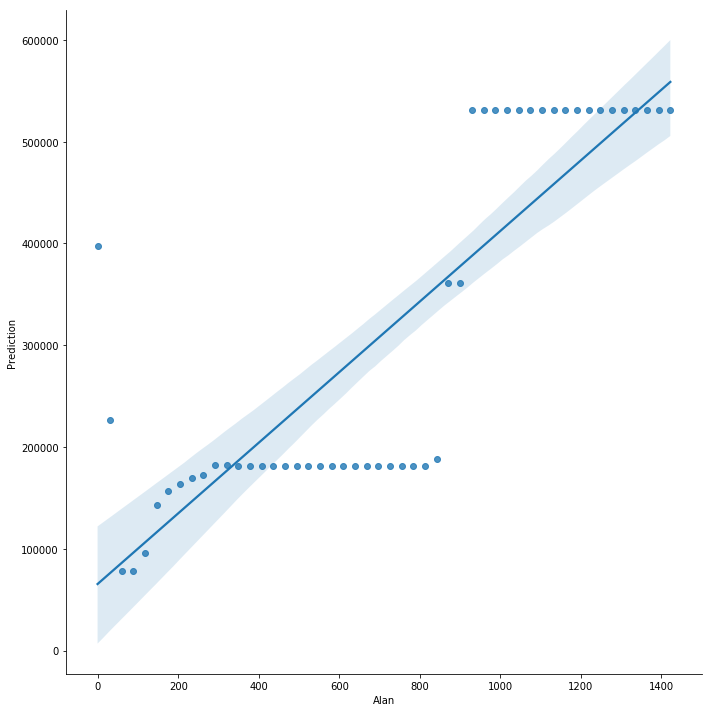

In [27]:
#scatter plot 

var = alan50.mevcut_alani
data = pd.DataFrame(data=[preds,var]).T
data.columns=['Prediction','Alan']
data

g = sns.lmplot(x="Alan", y="Prediction",
               truncate=True, size=10, data=data)


#### Yuzolcumu Graph 

In [28]:
func = lambda x : x.left
grouped_yuzolcumu = grouped_yuzolcumu.YuzolcumuBand.apply(func)
grouped_yuzolcumu

0       -112.399
1       2268.980
2       4536.960
3       6804.940
4       9072.920
5      11340.900
6      13608.880
7      15876.860
8      18144.840
9      20412.820
10     22680.800
11     24948.780
12     27216.760
13     29484.740
14     31752.720
15     34020.700
16     36288.680
17     38556.660
18     40824.640
19     43092.620
20     45360.600
21     47628.580
22     49896.560
23     52164.540
24     54432.520
25     56700.500
26     58968.480
27     61236.460
28     63504.440
29     65772.420
30     68040.400
31     70308.380
32     72576.360
33     74844.340
34     77112.320
35     79380.300
36     81648.280
37     83916.260
38     86184.240
39     88452.220
40     90720.200
41     92988.180
42     95256.160
43     97524.140
44     99792.120
45    102060.100
46    104328.080
47    106596.060
48    108864.040
49    111132.020
Name: YuzolcumuBand, dtype: category
Categories (50, float64): [-112.399 < 2268.980 < 4536.960 < 6804.940 ... 104328.08 < 106596.06 < 108864.04 < 1111

In [29]:
yuzolcumu50 = means
yuzolcumu50 = yuzolcumu50.append([yuzolcumu50]*49,ignore_index=True)
yuzolcumu50.yuzolcumu = grouped_yuzolcumu
yuzolcumu50

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
0,2.208811,-112.399,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
1,2.208811,2268.980,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
2,2.208811,4536.960,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
3,2.208811,6804.940,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
4,2.208811,9072.920,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
5,2.208811,11340.900,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
6,2.208811,13608.880,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
7,2.208811,15876.860,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
8,2.208811,18144.840,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
9,2.208811,20412.820,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159


In [30]:
X_ = yuzolcumu50.drop('adil_piyasa_degeri_yasal_durum',axis=1)
y_ = yuzolcumu50['adil_piyasa_degeri_yasal_durum']

In [31]:
preds = rf.predict(X_)


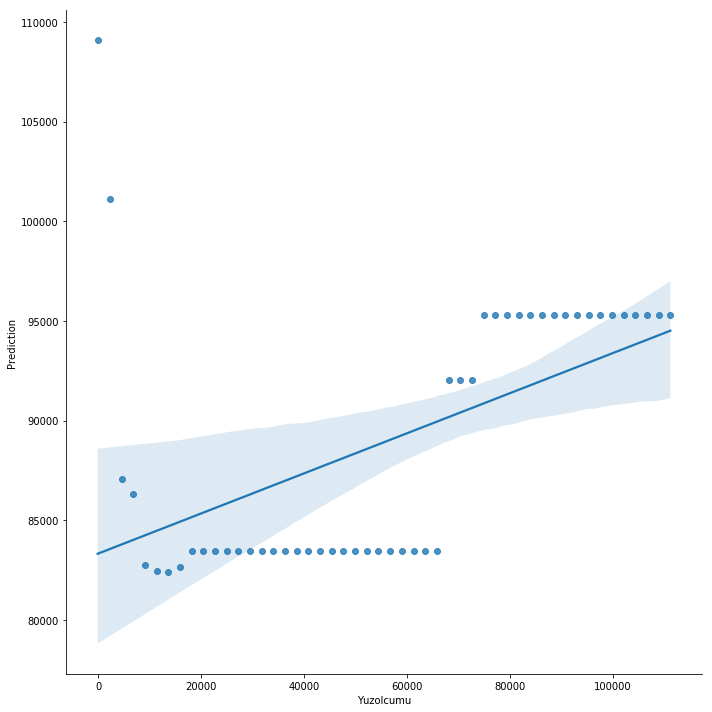

In [32]:
#scatter plot 

var = yuzolcumu50.yuzolcumu
data = pd.DataFrame(data=[preds,var]).T
data.columns=['Prediction','Yuzolcumu']
data

g = sns.lmplot(x="Yuzolcumu", y="Prediction",
               truncate=True, size=10, data=data)


#### Area  Graph 

area =  $ (pay*yuzolcumu)/payda $

In [33]:
func = lambda x : x.left
grouped_area = grouped_area.AreaBand.apply(func)
grouped_area

0       -8.683
1      177.292
2      354.412
3      531.532
4      708.651
5      885.771
6     1062.890
7     1240.010
8     1417.129
9     1594.249
10    1771.369
11    1948.488
12    2125.608
13    2302.727
14    2479.847
15    2656.966
16    2834.086
17    3011.205
18    3188.325
19    3365.445
20    3542.564
21    3719.684
22    3896.803
23    4073.923
24    4251.042
25    4428.162
26    4605.281
27    4782.401
28    4959.521
29    5136.640
30    5313.760
31    5490.879
32    5667.999
33    5845.118
34    6022.238
35    6199.357
36    6376.477
37    6553.597
38    6730.716
39    6907.836
40    7084.955
41    7262.075
42    7439.194
43    7616.314
44    7793.433
45    7970.553
46    8147.673
47    8324.792
48    8501.912
49    8679.031
Name: AreaBand, dtype: category
Categories (50, float64): [-8.683 < 177.292 < 354.412 < 531.532 ... 8147.673 < 8324.792 < 8501.912 < 8679.031]

In [34]:
area50 = means
area50 = area50.append([area50]*49,ignore_index=True)
area50.area = grouped_area
area50

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
0,2.208811,2397.326185,124.543172,119176.872247,-8.683,26.402643,0.759471,0.062555,0.045815,0.132159
1,2.208811,2397.326185,124.543172,119176.872247,177.292,26.402643,0.759471,0.062555,0.045815,0.132159
2,2.208811,2397.326185,124.543172,119176.872247,354.412,26.402643,0.759471,0.062555,0.045815,0.132159
3,2.208811,2397.326185,124.543172,119176.872247,531.532,26.402643,0.759471,0.062555,0.045815,0.132159
4,2.208811,2397.326185,124.543172,119176.872247,708.651,26.402643,0.759471,0.062555,0.045815,0.132159
5,2.208811,2397.326185,124.543172,119176.872247,885.771,26.402643,0.759471,0.062555,0.045815,0.132159
6,2.208811,2397.326185,124.543172,119176.872247,1062.890,26.402643,0.759471,0.062555,0.045815,0.132159
7,2.208811,2397.326185,124.543172,119176.872247,1240.010,26.402643,0.759471,0.062555,0.045815,0.132159
8,2.208811,2397.326185,124.543172,119176.872247,1417.129,26.402643,0.759471,0.062555,0.045815,0.132159
9,2.208811,2397.326185,124.543172,119176.872247,1594.249,26.402643,0.759471,0.062555,0.045815,0.132159


In [35]:
X_ = area50.drop('adil_piyasa_degeri_yasal_durum',axis=1)
y_ = area50['adil_piyasa_degeri_yasal_durum']

In [36]:
preds = rf.predict(X_)


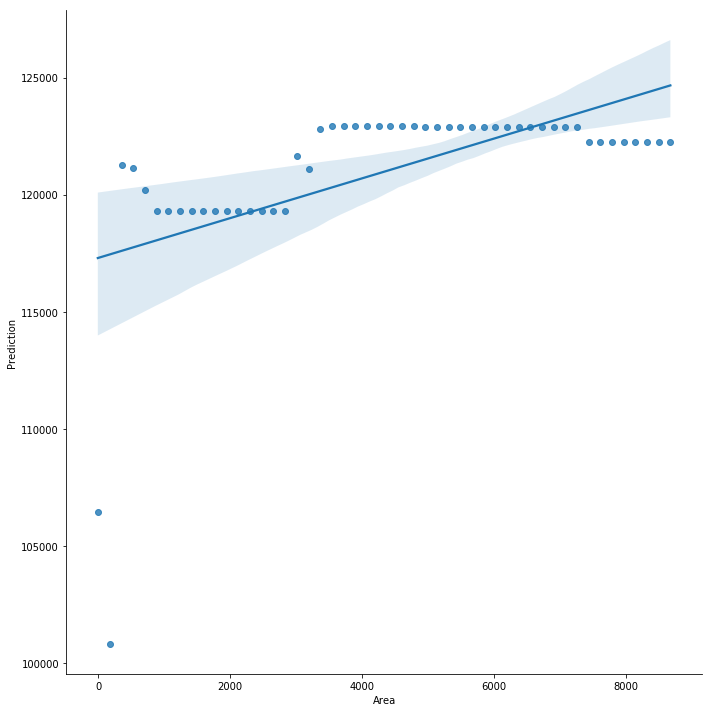

In [37]:
#scatter plot 

var = area50.area
data = pd.DataFrame(data=[preds,var]).T
data.columns=['Prediction','Area']
data

g = sns.lmplot(x="Area", y="Prediction",
               truncate=True, size=10, data=data)


#### Bagimsiz Kat Graph 

In [38]:
func = lambda x : x.left
grouped_kat = grouped_kat.KatBand.apply(func)
grouped_kat

0    -1.011
1    -0.780
2    -0.560
3    -0.340
4    -0.120
5     0.100
6     0.320
7     0.540
8     0.760
9     0.980
10    1.200
11    1.420
12    1.640
13    1.860
14    2.080
15    2.300
16    2.520
17    2.740
18    2.960
19    3.180
20    3.400
21    3.620
22    3.840
23    4.060
24    4.280
25    4.500
26    4.720
27    4.940
28    5.160
29    5.380
30    5.600
31    5.820
32    6.040
33    6.260
34    6.480
35    6.700
36    6.920
37    7.140
38    7.360
39    7.580
40    7.800
41    8.020
42    8.240
43    8.460
44    8.680
45    8.900
46    9.120
47    9.340
48    9.560
49    9.780
Name: KatBand, dtype: category
Categories (50, float64): [-1.011 < -0.780 < -0.560 < -0.340 ... 9.12 < 9.34 < 9.56 < 9.78]

In [39]:
kat50 = means
kat50 = kat50.append([kat50]*49,ignore_index=True)
kat50.bagimsiz_bolum_kat = grouped_kat
kat50

,bagimsiz_bolum_kat,yuzolcumu,mevcut_alani,adil_piyasa_degeri_yasal_durum,area,duration,mahalle_kod_4673,mahalle_kod_4674,mahalle_kod_4675,mahalle_kod_4676
0,-1.011,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
1,-0.780,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
2,-0.560,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
3,-0.340,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
4,-0.120,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
5,0.100,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
6,0.320,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
7,0.540,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
8,0.760,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159
9,0.980,2397.326185,124.543172,119176.872247,75.447215,26.402643,0.759471,0.062555,0.045815,0.132159


In [40]:
X_ = kat50.drop('adil_piyasa_degeri_yasal_durum',axis=1)
y_ = kat50['adil_piyasa_degeri_yasal_durum']

In [41]:
preds = rf.predict(X_)


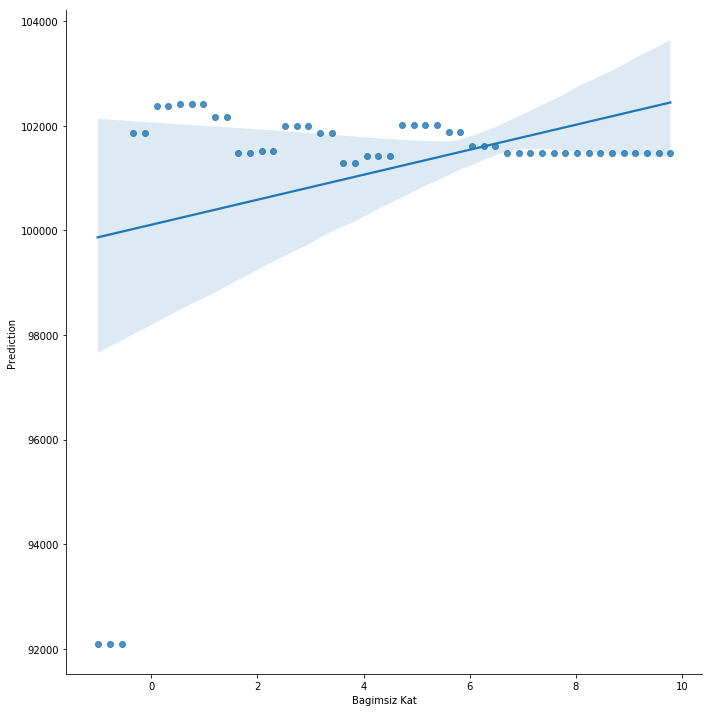

In [42]:
#scatter plot 

var = kat50.bagimsiz_bolum_kat
data = pd.DataFrame(data=[preds,var]).T
data.columns=['Prediction','Bagimsiz Kat']
data

g = sns.lmplot(x="Bagimsiz Kat", y="Prediction",
               truncate=True, size=10, data=data)
